# Importing Libraries

In [212]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Reading Raw Data

In [213]:
copper_history = pd.read_csv("dirty_dataset_1.csv")
copper_history_2 = pd.read_csv("dirty_dataset_2.csv")

## Setting Date Column to Date format

In [214]:
copper_history['Date'] = pd.to_datetime(copper_history['Date'])
copper_history_2['Date'] = pd.to_datetime(copper_history_2['Date'])

## Sorting by Date

In [215]:
copper_history_2.sort_values(by='Date')
copper_history.sort_values(by='Date')

,Date,Price,Open,High,Low,Vol.,Change %
4999,1988-08-01,0.8655,0.8655,0.8655,0.8655,NaN,-1.20%
4998,1988-08-02,0.8600,0.8600,0.8600,0.8600,NaN,-0.64%
4997,1988-08-03,0.8680,0.8680,0.8680,0.8680,NaN,0.93%
4996,1988-08-04,0.8780,0.8780,0.8780,0.8780,NaN,1.15%
4995,1988-08-05,0.8870,0.8870,0.8870,0.8870,NaN,1.03%
...,...,...,...,...,...,...,...
4,2008-07-01,3.9105,3.8695,3.9245,3.8500,8.34K,0.72%
3,2008-07-02,4.0635,3.8940,4.0800,3.8775,22.95K,3.91%
2,2008-07-03,3.9490,4.0235,4.0450,3.9260,15.83K,-2.82%
1,2008-07-07,3.8490,3.8745,3.9000,3.8030,15.01K,-2.53%


# Fixing Errors and Handling Missing Values

## Merge into 1 DataFrame

In [218]:
all_history = pd.DataFrame(columns=copper_history.columns)
all_history = pd.concat([copper_history, copper_history_2], ignore_index=True)
all_history = all_history.sort_values(by='Date')
all_history

,Date,Price,Open,High,Low,Vol.,Change %
4999,1988-08-01,0.8655,0.8655,0.8655,0.8655,NaN,-1.20%
4998,1988-08-02,0.8600,0.8600,0.8600,0.8600,NaN,-0.64%
4997,1988-08-03,0.8680,0.8680,0.8680,0.8680,NaN,0.93%
4996,1988-08-04,0.8780,0.8780,0.8780,0.8780,NaN,1.15%
4995,1988-08-05,0.8870,0.8870,0.8870,0.8870,NaN,1.03%
...,...,...,...,...,...,...,...
5004,2023-08-28,3.7920,3.7950,3.8290,3.7800,36.18K,0.34%
5003,2023-08-29,3.8390,3.8025,3.8445,3.7870,57.95K,1.24%
5002,2023-08-30,3.8440,3.8395,3.8505,3.8120,56.86K,0.13%
5001,2023-08-31,3.8220,3.8385,3.8465,3.7985,52.79K,-0.57%


## Identifying Rows with Any Missing Data

In [220]:
rows_with_missing = all_history[all_history.isna().any(axis=1)]
rows_with_missing

,Date,Price,Open,High,Low,Vol.,Change %
4999,1988-08-01,0.8655,0.8655,0.8655,0.8655,NaN,-1.20%
4998,1988-08-02,0.8600,0.8600,0.8600,0.8600,NaN,-0.64%
4997,1988-08-03,0.8680,0.8680,0.8680,0.8680,NaN,0.93%
4996,1988-08-04,0.8780,0.8780,0.8780,0.8780,NaN,1.15%
4995,1988-08-05,0.8870,0.8870,0.8870,0.8870,NaN,1.03%
...,...,...,...,...,...,...,...
5054,2023-06-19,3.8643,3.8723,3.8878,3.8518,NaN,-0.25%
5043,2023-07-04,3.7843,3.7915,3.8093,3.7750,NaN,-0.26%
5030,2023-07-21,3.8180,3.8280,3.8740,3.8090,NaN,-0.43%
5029,2023-07-24,3.8555,3.8185,3.8605,3.7820,NaN,0.98%


## Removing Unnecessary Columns

In [222]:
all_history = all_history.drop(columns=['Vol.', 'Change %', 'Open', 'High', 'Low'])

## Resetting Index

In [226]:
all_history.set_index('Date', inplace=True)
all_history = all_history.reset_index(drop=False)
all_history

,Date,Price
0,1988-08-01,0.8655
1,1988-08-02,0.8600
2,1988-08-03,0.8680
3,1988-08-04,0.8780
4,1988-08-05,0.8870
...,...,...
8883,2023-08-28,3.7920
8884,2023-08-29,3.8390
8885,2023-08-30,3.8440
8886,2023-08-31,3.8220


## Removing Duplicated Rows

In [227]:
all_history.drop_duplicates()
all_history

,Date,Price
0,1988-08-01,0.8655
1,1988-08-02,0.8600
2,1988-08-03,0.8680
3,1988-08-04,0.8780
4,1988-08-05,0.8870
...,...,...
8883,2023-08-28,3.7920
8884,2023-08-29,3.8390
8885,2023-08-30,3.8440
8886,2023-08-31,3.8220


# Plotting Data

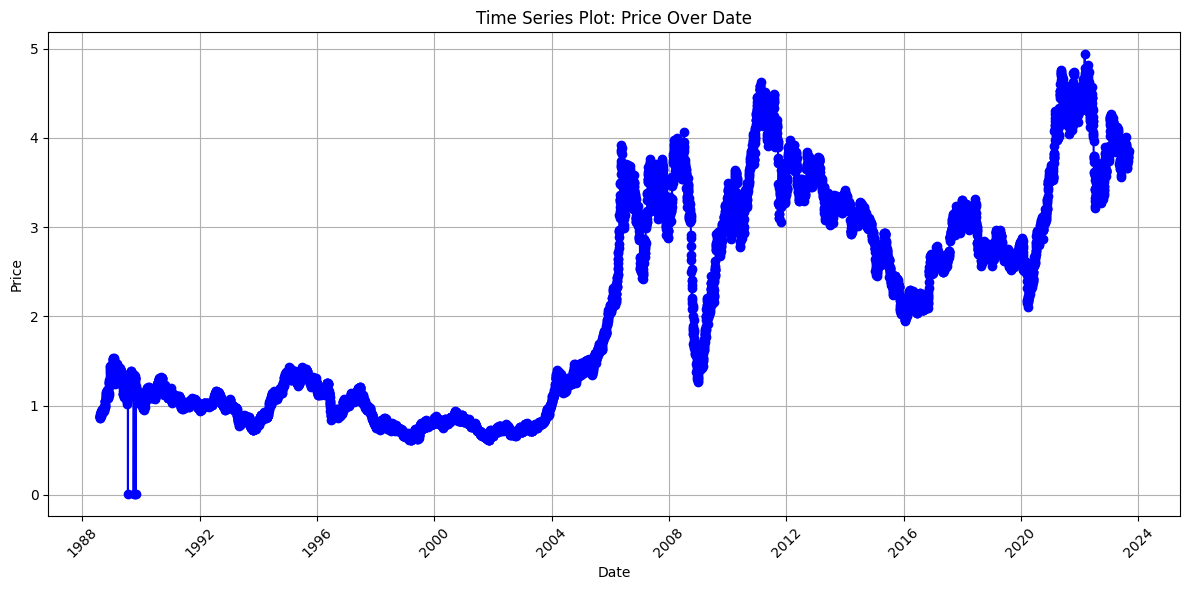

In [205]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(all_history['Date'], all_history['Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot: Price Over Date')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

# Eliminating Outliers

In [206]:
lower_bound = 0.1
for index, row in all_history.iterrows():
    if row['Price'] < lower_bound:
        # Calculate the mean of the previous 7 days' prices
        start_date = row['Date'] - pd.DateOffset(days=8)
        end_date = row['Date'] - pd.DateOffset(days=1)
        previous_7_days_mean = all_history[(all_history['Date'] >= start_date) & (all_history['Date'] <= end_date)]['Price'].mean()
        
        # Replace 'updated_price' with the calculated mean
        all_history.at[index, 'Price'] = previous_7_days_mean
all_history

,Date,Price
0,1988-08-01,0.8655
1,1988-08-02,0.8600
2,1988-08-03,0.8680
3,1988-08-04,0.8780
4,1988-08-05,0.8870
...,...,...
8883,2023-08-28,3.7920
8884,2023-08-29,3.8390
8885,2023-08-30,3.8440
8886,2023-08-31,3.8220


# Plotting Data Again

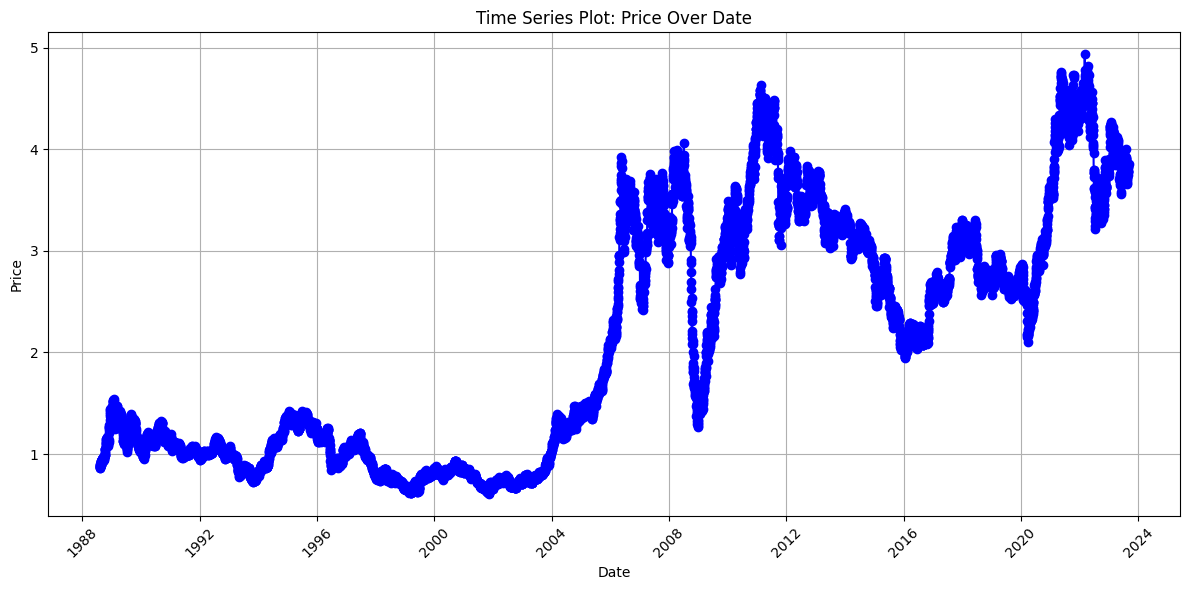

In [207]:
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(all_history['Date'], all_history['Price'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot: Price Over Date')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

# Saving Cleaned Dataset

In [228]:
all_history.to_csv('cleaned_dataset.csv', index=False)